--- Loading and Processing File: C:\FYP\emg.csv ---
Read 45161 lines.
Successfully converted 45137 lines to numbers.
Skipped 24 lines due to conversion errors.

Successfully created DataFrame. Shape: (45137, 1)
First 5 rows:
   EMG_Value
0      277.0
1      272.0
2      272.0
3      266.0
4      265.0

Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45137 entries, 0 to 45136
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EMG_Value  45137 non-null  float64
dtypes: float64(1)
memory usage: 352.8 KB
Converted EMG_Value column to integer.
Added 'Sample' index column.

--- Descriptive Statistics ---
count    45137.000000
mean       318.250327
std        158.808136
min          0.000000
25%        291.000000
50%        299.000000
75%        309.000000
max       1020.000000
Name: EMG_Value, dtype: float64

--- Generating Plot ---


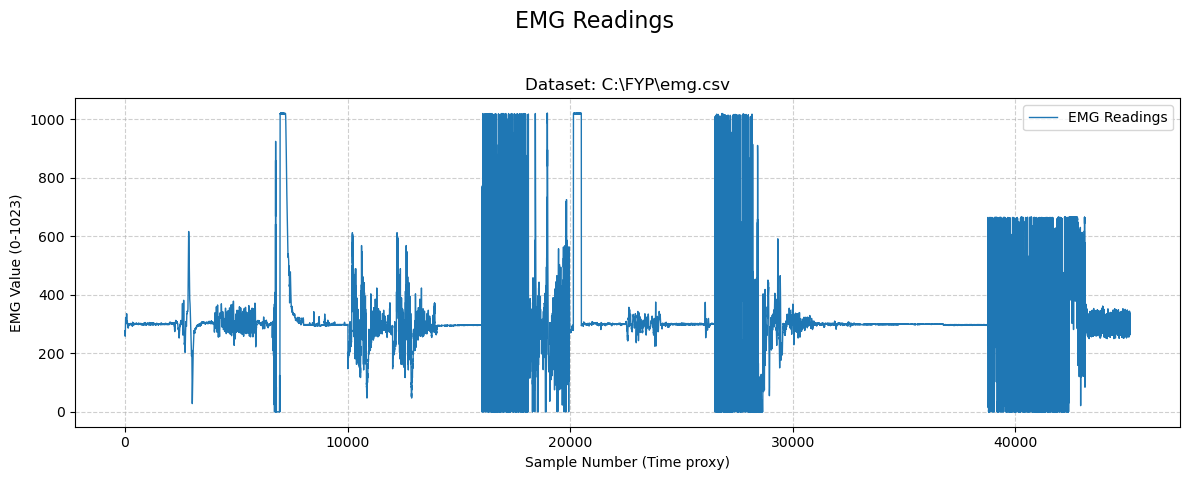

Plot generated successfully.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Define file path for the newly uploaded file
file_path = 'C:\FYP\emg.csv' # Use the newly uploaded file [cite: 1]

# Attempt to load the CSV file line-by-line
print(f"--- Loading and Processing File: {file_path} ---")
readings = []
line_count = 0
error_count = 0

try:
    with open(file_path, 'r') as f:
        for line in f:
            line_count += 1
            cleaned_line = line.strip() # Remove leading/trailing whitespace
            if cleaned_line: # Check if line is not empty
                try:
                    # Attempt to convert the cleaned line to a float
                    value = float(cleaned_line)
                    readings.append(value)
                except ValueError:
                    error_count += 1
                    # Optional: print lines that cause errors
                    # print(f"Warning: Could not convert line {line_count} to number: '{cleaned_line}'")

    print(f"Read {line_count} lines.")
    print(f"Successfully converted {len(readings)} lines to numbers.")
    if error_count > 0:
        print(f"Skipped {error_count} lines due to conversion errors.")

    # Check if any valid readings were found
    if not readings:
        print("\nError: No valid numeric data found in the file.")
        df = None
    else:
        # Create DataFrame from the list of readings
        df = pd.DataFrame(readings, columns=['EMG_Value'])
        print(f"\nSuccessfully created DataFrame. Shape: {df.shape}")
        print("First 5 rows:")
        print(df.head())
        print("\nData Types and Info:")
        df.info()

        # Convert to integer type if appropriate (optional)
        # Check if all values can be safely converted to int
        if (df['EMG_Value'] == df['EMG_Value'].astype(int)).all():
             df['EMG_Value'] = df['EMG_Value'].astype(int)
             print("Converted EMG_Value column to integer.")

        # Add sample index
        df['Sample'] = range(len(df))
        print("Added 'Sample' index column.")


except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'")
    df = None
except Exception as e:
    print(f"An error occurred during file processing: {e}")
    df = None

# Proceed only if the dataframe was created successfully
if df is not None:
    # --- Descriptive Statistics ---
    print("\n--- Descriptive Statistics ---")
    stats = df['EMG_Value'].describe()
    print(stats)

    # --- Visualization ---
    print("\n--- Generating Plot ---")
    try:
        fig, ax = plt.subplots(1, 1, figsize=(12, 5)) # Single plot
        fig.suptitle('EMG Readings', fontsize=16)

        # Plot Dataset
        ax.plot(df['Sample'], df['EMG_Value'], label='EMG Readings', linewidth=1)
        ax.set_title(f'Dataset: {file_path}')
        ax.set_xlabel('Sample Number (Time proxy)')
        ax.set_ylabel('EMG Value (0-1023)')
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.legend()
        # Format Y-axis
        ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
        ax.ticklabel_format(style='plain', axis='y')

        # Adjust layout and display plot
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
        plt.show()
        print("Plot generated successfully.")
    except Exception as e:
        print(f"Error generating plot: {e}")

else:
    print("\nCould not perform analysis because the file could not be processed correctly.")

--- Loading and Processing File: C://FYP//emg.csv ---
Read 45161 lines.
Successfully converted 45137 lines to numbers.
Skipped 24 lines due to conversion errors.
Successfully created DataFrame. Shape: (45137, 2)
--- Loading and Processing File: C://FYP//n-emg.xlsb.csv ---
Read 39989 lines.
Successfully converted 39968 lines to numbers.
Skipped 21 lines due to conversion errors.
Successfully created DataFrame. Shape: (39968, 2)
  Using Median: 299.00, Threshold Used: 449.00 for EMG_Value analysis
  Signal crosses threshold (449) at some points.
  Using Median: 300.00, Threshold Used: 450.00 for EMG_Value analysis
  Signal crosses threshold (450) at some points.

--- Generating Plots with Thresholds ---


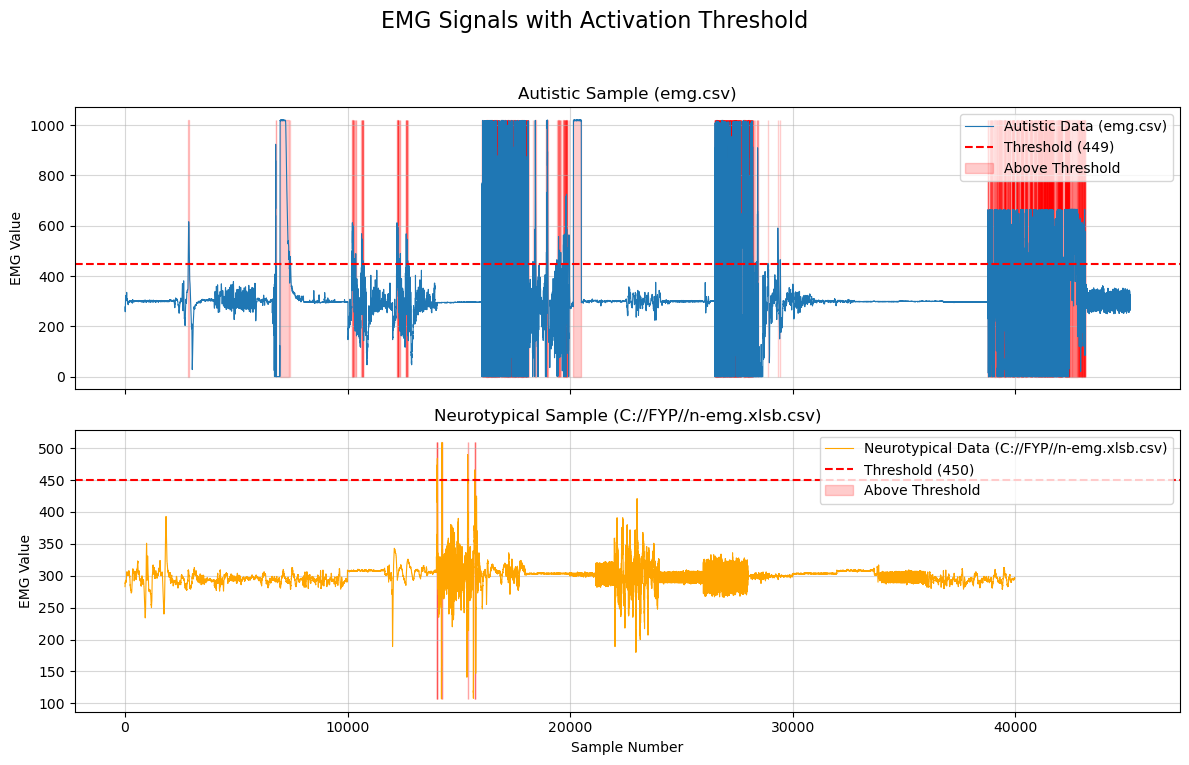

Plot generated.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Define file paths
file_path_aut = 'C://FYP//emg.csv' # Autistic group data
file_path_nt = 'C://FYP//n-emg.xlsb.csv' # Neurotypical group data

def load_and_clean_emg_data(file_path):
    """Loads EMG data using line-by-line reading, cleans it, and returns a DataFrame."""
    print(f"--- Loading and Processing File: {file_path} ---")
    readings = []
    line_count = 0
    error_count = 0
    df = None

    try:
        with open(file_path, 'r') as f:
            for line in f:
                line_count += 1
                cleaned_line = line.strip()
                if cleaned_line:
                    try:
                        value = float(cleaned_line)
                        readings.append(value)
                    except ValueError:
                        error_count += 1

        print(f"Read {line_count} lines.")
        print(f"Successfully converted {len(readings)} lines to numbers.")
        if error_count > 0:
            print(f"Skipped {error_count} lines due to conversion errors.")

        if not readings:
            print(f"\nError: No valid numeric data found in '{file_path}'.")
        else:
            df = pd.DataFrame(readings, columns=['EMG_Value'])
            # Convert to integer if appropriate
            if not df.empty and (df['EMG_Value'] % 1 == 0).all(): # Check if all values are whole numbers
                 # Ensure no NaNs before converting to int
                 if df['EMG_Value'].notna().all():
                     df['EMG_Value'] = df['EMG_Value'].astype(int)
            # Add sample index
            df['Sample'] = range(len(df))
            print(f"Successfully created DataFrame. Shape: {df.shape}")
            # df.info() # Keep info print concise for this step

    except FileNotFoundError:
        print(f"Error: File not found at '{file_path}'")
    except Exception as e:
        print(f"An error occurred processing '{file_path}': {e}")

    return df

def analyze_emg_events(df, column_name='EMG_Value', threshold_offset=150, min_duration=3):
    """
    Identifies EMG activation events based on a threshold relative to the median.
    Returns threshold value and boolean series indicating supra-threshold samples.
    (Metrics calculation removed for this simplified visualization step)
    """
    results = {'threshold': np.nan, 'above_threshold_bool': None, 'median_val': np.nan}
    if df is None or df.empty or column_name not in df.columns or len(df) < min_duration:
        print("  Input DataFrame is invalid or too short for analysis.")
        return results

    median_val = df[column_name].median()
    threshold = median_val + threshold_offset
    results['median_val'] = median_val
    results['threshold'] = threshold
    print(f"  Using Median: {median_val:.2f}, Threshold Used: {threshold:.2f} for {column_name} analysis")

    results['above_threshold_bool'] = df[column_name] > threshold

    # Basic event detection just to see if *any* point crosses threshold (ignoring min duration for vis)
    if results['above_threshold_bool'].any():
         print(f"  Signal crosses threshold ({threshold:.0f}) at some points.")
    else:
         print(f"  Signal NEVER crosses threshold ({threshold:.0f}).")


    return results

# --- Load Data ---
df_aut = load_and_clean_emg_data(file_path_aut)
df_nt = load_and_clean_emg_data(file_path_nt)

# --- Run simplified analysis just to get thresholds and boolean masks ---
threshold_offset_val = 150 # Use the same offset as before
res_aut = analyze_emg_events(df_aut, threshold_offset=threshold_offset_val)
res_nt = analyze_emg_events(df_nt, threshold_offset=threshold_offset_val)

# --- Visualization ---
print("\n--- Generating Plots with Thresholds ---")

# Check if dataframes are valid before plotting
plot_aut = df_aut is not None and not df_aut.empty and res_aut is not None
plot_nt = df_nt is not None and not df_nt.empty and res_nt is not None

if plot_aut or plot_nt:
    num_plots = sum([plot_aut, plot_nt])
    fig, axes = plt.subplots(num_plots, 1, figsize=(12, 4 * num_plots), sharex=True)
    fig.suptitle('EMG Signals with Activation Threshold', fontsize=16)

    # Ensure axes is always iterable, even if num_plots is 1
    if num_plots == 1:
        axes = [axes]

    plot_index = 0
    if plot_aut:
        ax = axes[plot_index]
        threshold_aut = res_aut['threshold']
        above_threshold_aut = res_aut['above_threshold_bool']

        ax.plot(df_aut['Sample'], df_aut['EMG_Value'], label='Autistic Data (emg.csv)', linewidth=0.8)
        if not np.isnan(threshold_aut):
            ax.axhline(threshold_aut, color='r', linestyle='--', label=f'Threshold ({threshold_aut:.0f})')
            # Shade areas above threshold
            if above_threshold_aut is not None:
                 ax.fill_between(df_aut['Sample'], df_aut['EMG_Value'].min(), df_aut['EMG_Value'].max(), where=above_threshold_aut, color='red', alpha=0.2, label='Above Threshold')

        ax.set_title('Autistic Sample (emg.csv)')
        ax.set_ylabel('EMG Value')
        ax.legend(loc='upper right')
        ax.grid(True, alpha=0.5)
        ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
        ax.ticklabel_format(style='plain', axis='y')
        plot_index += 1

    if plot_nt:
        ax = axes[plot_index]
        threshold_nt = res_nt['threshold']
        above_threshold_nt = res_nt['above_threshold_bool']

        ax.plot(df_nt['Sample'], df_nt['EMG_Value'], label=f'Neurotypical Data ({file_path_nt})', linewidth=0.8, color='orange')
        if not np.isnan(threshold_nt):
            ax.axhline(threshold_nt, color='r', linestyle='--', label=f'Threshold ({threshold_nt:.0f})')
             # Shade areas above threshold
            if above_threshold_nt is not None:
                 ax.fill_between(df_nt['Sample'], df_nt['EMG_Value'].min(), df_nt['EMG_Value'].max(), where=above_threshold_nt, color='red', alpha=0.2, label='Above Threshold')

        ax.set_title(f'Neurotypical Sample ({file_path_nt})')
        ax.set_xlabel('Sample Number')
        ax.set_ylabel('EMG Value')
        ax.legend(loc='upper right')
        ax.grid(True, alpha=0.5)
        ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
        ax.ticklabel_format(style='plain', axis='y')
        plot_index += 1

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    print("Plot generated.")

else:
    print("Could not generate plots as one or both data files failed to load correctly.")

In [3]:
import os
import csv

# --- CONFIGURE THIS ---
INPUT_FILE = 'emg.csv'      # your raw EMG file
OUTPUT_DIR = 'neurodivergent'    # folder to save individual CSVs
# ------------------------

# Ensure output directory exists
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Read the entire file (handle BOM if present)
with open(INPUT_FILE, 'r', encoding='utf-8-sig') as f:
    raw = f.read()

# Split into chunks by comma (one chunk per individual)
chunks = raw.split(',')

for idx, chunk in enumerate(chunks, start=1):
    # 1) Strip quotes & whitespace
    cleaned = chunk.replace('"', '').strip()
    # 2) Split into lines, drop empties
    lines = [line.strip() for line in cleaned.splitlines() if line.strip()]
    # 3) Parse ints (skip bad lines)
    readings = []
    for line in lines:
        try:
            readings.append(int(line))
        except ValueError:
            # non-numeric line — ignore
            pass

    # 4) Write out to CSV
    out_path = os.path.join(OUTPUT_DIR, f'individual_{idx}.csv')
    with open(out_path, 'w', newline='') as outf:
        writer = csv.writer(outf)
        writer.writerow(['EMG'])              # header
        for val in readings:
            writer.writerow([val])

    print(f'[✔] Saved {len(readings)} readings → {out_path}')


[✔] Saved 2000 readings → neurodivergent\individual_1.csv
[✔] Saved 2006 readings → neurodivergent\individual_2.csv
[✔] Saved 2000 readings → neurodivergent\individual_3.csv
[✔] Saved 2020 readings → neurodivergent\individual_4.csv
[✔] Saved 2000 readings → neurodivergent\individual_5.csv
[✔] Saved 2007 readings → neurodivergent\individual_6.csv
[✔] Saved 2007 readings → neurodivergent\individual_7.csv
[✔] Saved 2000 readings → neurodivergent\individual_8.csv
[✔] Saved 2099 readings → neurodivergent\individual_9.csv
[✔] Saved 2020 readings → neurodivergent\individual_10.csv
[✔] Saved 360 readings → neurodivergent\individual_11.csv
[✔] Saved 2000 readings → neurodivergent\individual_12.csv
[✔] Saved 2000 readings → neurodivergent\individual_13.csv
[✔] Saved 2000 readings → neurodivergent\individual_14.csv
[✔] Saved 2269 readings → neurodivergent\individual_15.csv
[✔] Saved 2003 readings → neurodivergent\individual_16.csv
[✔] Saved 2000 readings → neurodivergent\individual_17.csv
[✔] Sav

[→] Found 23 files. Processing all…


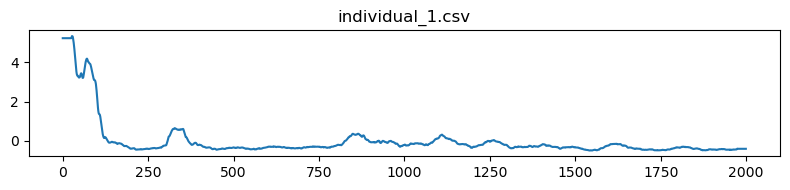

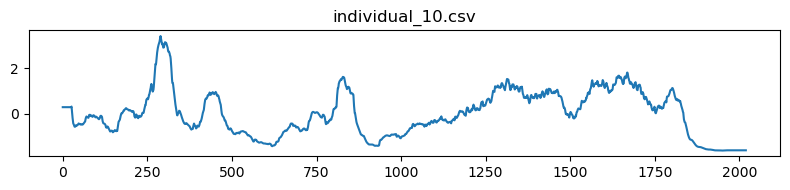

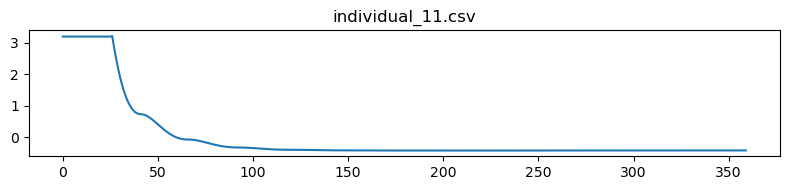

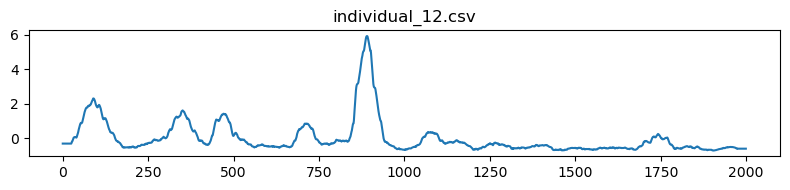

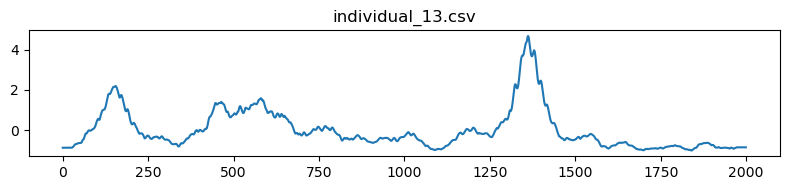

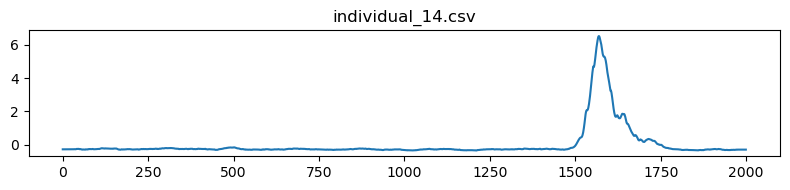

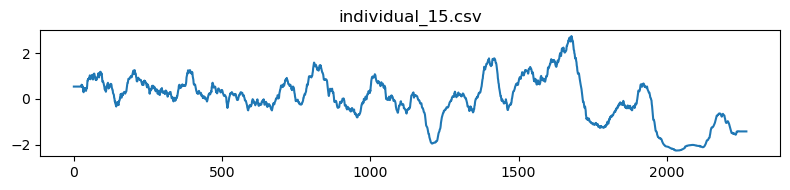

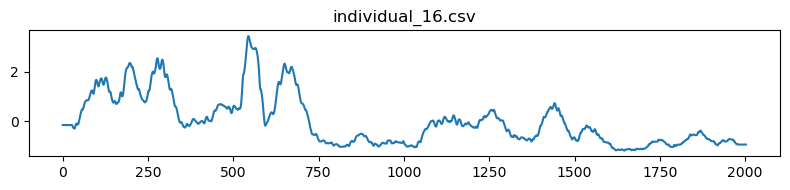

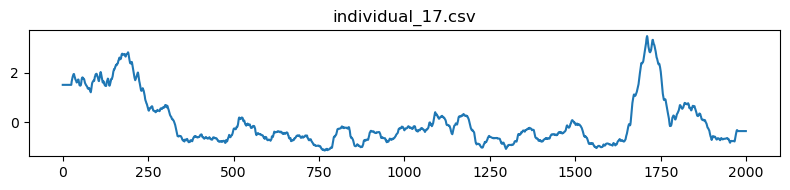

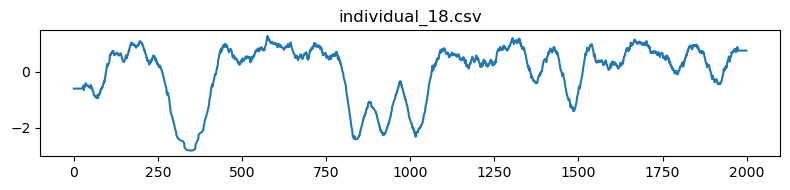

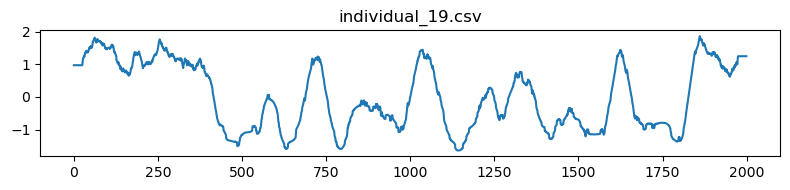

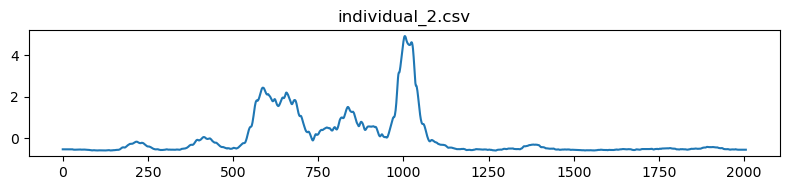

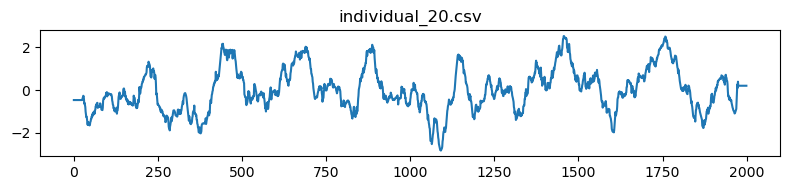

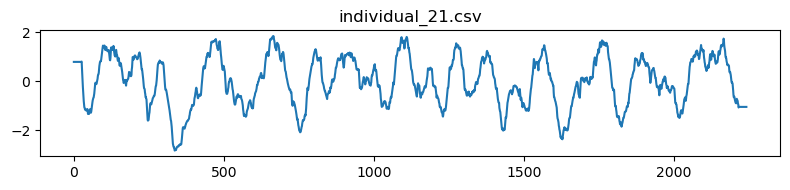

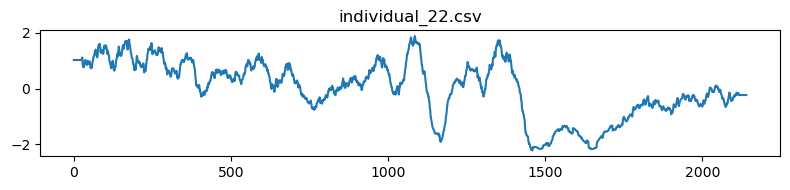

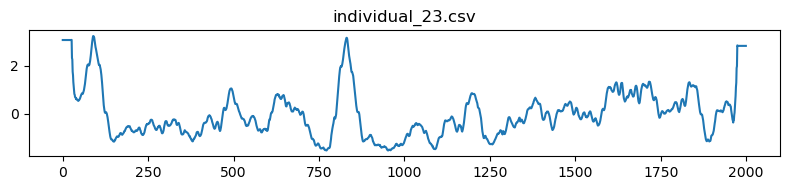

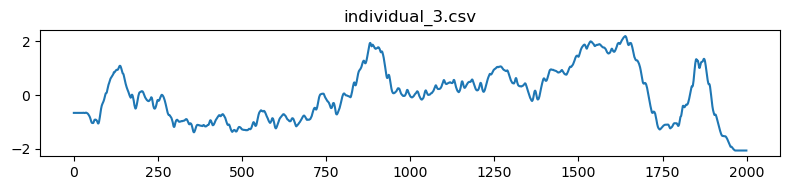

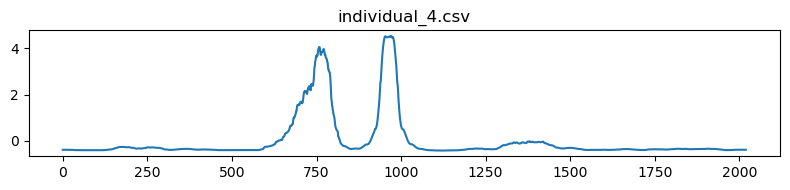

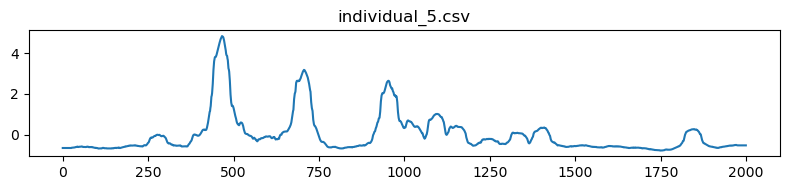

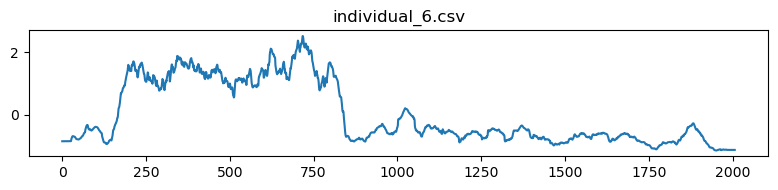

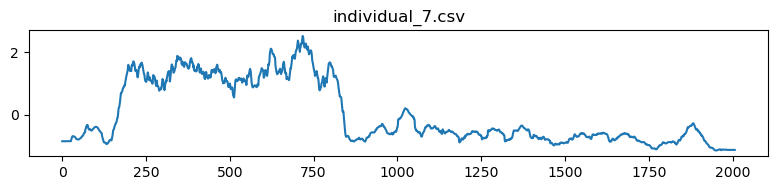

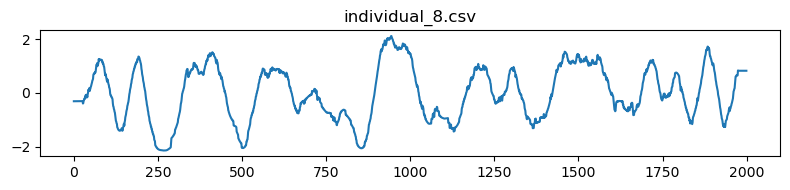

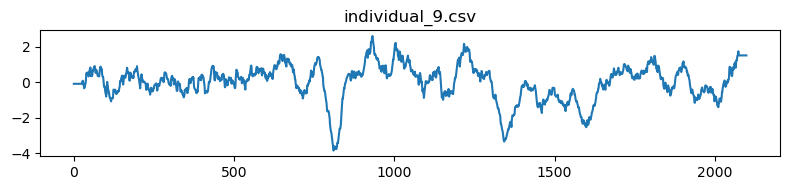

[✔] Done. Summary stats written to neurodivergent\summary_stats.csv
               id  count          mean  std       min       max
0    individual_1   2000  2.842171e-17  1.0 -0.486243  5.334743
1   individual_10   2020 -2.110523e-16  1.0 -1.630131  3.431720
2   individual_11    360 -3.947460e-17  1.0 -0.414669  3.205565
3   individual_12   2000  1.705303e-16  1.0 -0.712750  5.931515
4   individual_13   2000  1.847411e-16  1.0 -1.011841  4.671038
5   individual_14   2000  8.526513e-17  1.0 -0.352341  6.524804
6   individual_15   2269 -1.002088e-16  1.0 -2.264825  2.762127
7   individual_16   2003 -5.675828e-17  1.0 -1.179096  3.449699
8   individual_17   2000 -2.131628e-16  1.0 -1.148094  3.487339
9   individual_18   2000  1.705303e-16  1.0 -2.808321  1.262484
10  individual_19   2000 -1.065814e-16  1.0 -1.646415  1.870315
11   individual_2   2006 -1.133468e-16  1.0 -0.596732  4.940026
12  individual_20   2000 -2.557954e-16  1.0 -2.825763  2.530495
13  individual_21   2242  4.120007e-

In [4]:
import os
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# CONFIG
DATA_DIR = 'neurodivergent'         # folder containing individual_1.csv … individual_23.csv
FS = 1000                      # sampling rate in Hz
LOWCUT, HIGHCUT = 20, 450      # EMG bandpass in Hz
ENVELOPE_WINDOW_MS = 50        # smoothing window for envelope

# HELPER: band-pass Butterworth
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut/nyq, highcut/nyq], btype='band')
    return filtfilt(b, a, signal)

# PIPELINE: filter → rectify → envelope → normalize
def preprocess_emg(raw, fs, lowcut, highcut, window_ms):
    # 1) band-pass
    filt = bandpass_filter(raw, lowcut, highcut, fs)
    # 2) full-wave rectify
    rect = np.abs(filt)
    # 3) moving-average envelope
    win_pts = max(1, int(window_ms/1000*fs))
    env = pd.Series(rect).rolling(win_pts, center=True).mean()
    env = env.fillna(method='bfill').fillna(method='ffill').values
    # 4) z-score normalize
    return (env - env.mean()) / env.std()

# MAIN
stats = []
file_list = sorted([f for f in os.listdir(DATA_DIR) if f.startswith('individual_') and f.endswith('.csv')])

print(f"[→] Found {len(file_list)} files. Processing all…")

for fname in file_list:
    path = os.path.join(DATA_DIR, fname)
    df = pd.read_csv(path)
    emg = df['EMG'].dropna().values.astype(float)
    
    proc = preprocess_emg(emg, FS, LOWCUT, HIGHCUT, ENVELOPE_WINDOW_MS)
    
    # collect summary stats
    stats.append({
        'id': fname.replace('.csv',''),
        'count': len(proc),
        'mean': proc.mean(),
        'std': proc.std(),
        'min': proc.min(),
        'max': proc.max()
    })
    
    # optional: save processed envelope back to CSV
    # out_proc = pd.DataFrame({ 'EMG_proc': proc })
    # out_proc.to_csv(os.path.join(DATA_DIR, fname.replace('.csv','_proc.csv')), index=False)
    
    # quick check-plot for every file (remove or comment out plt.show() in headless mode)
    plt.figure(figsize=(8,2))
    plt.plot(proc)
    plt.title(fname)
    plt.tight_layout()
    plt.show()

# aggregate & save stats
stats_df = pd.DataFrame(stats)
stats_df.to_csv(os.path.join(DATA_DIR, 'summary_stats.csv'), index=False)
print(f"[✔] Done. Summary stats written to {os.path.join(DATA_DIR, 'summary_stats.csv')}")
print(stats_df)


In [5]:
import os
import csv

# --- CONFIGURE THIS ---
INPUT_FILE = 'n-emg.xlsb.csv'      # your raw EMG file
OUTPUT_DIR = 'neurotypical'    # folder to save individual CSVs
# ------------------------

# Ensure output directory exists
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Read the entire file (handle BOM if present)
with open(INPUT_FILE, 'r', encoding='utf-8-sig') as f:
    raw = f.read()

# Split into chunks by comma (one chunk per individual)
chunks = raw.split(',')

for idx, chunk in enumerate(chunks, start=1):
    # 1) Strip quotes & whitespace
    cleaned = chunk.replace('"', '').strip()
    # 2) Split into lines, drop empties
    lines = [line.strip() for line in cleaned.splitlines() if line.strip()]
    # 3) Parse ints (skip bad lines)
    readings = []
    for line in lines:
        try:
            readings.append(int(line))
        except ValueError:
            # non-numeric line — ignore
            pass

    # 4) Write out to CSV
    out_path = os.path.join(OUTPUT_DIR, f'individual_{idx}.csv')
    with open(out_path, 'w', newline='') as outf:
        writer = csv.writer(outf)
        writer.writerow(['EMG'])              # header
        for val in readings:
            writer.writerow([val])

    print(f'[✔] Saved {len(readings)} readings → {out_path}')


[✔] Saved 2000 readings → neurotypical\individual_1.csv
[✔] Saved 2000 readings → neurotypical\individual_2.csv
[✔] Saved 2000 readings → neurotypical\individual_3.csv
[✔] Saved 2000 readings → neurotypical\individual_4.csv
[✔] Saved 2000 readings → neurotypical\individual_5.csv
[✔] Saved 2000 readings → neurotypical\individual_6.csv
[✔] Saved 2000 readings → neurotypical\individual_7.csv
[✔] Saved 2000 readings → neurotypical\individual_8.csv
[✔] Saved 2000 readings → neurotypical\individual_9.csv
[✔] Saved 2000 readings → neurotypical\individual_10.csv
[✔] Saved 2000 readings → neurotypical\individual_11.csv
[✔] Saved 2000 readings → neurotypical\individual_12.csv
[✔] Saved 2000 readings → neurotypical\individual_13.csv
[✔] Saved 2000 readings → neurotypical\individual_14.csv
[✔] Saved 2000 readings → neurotypical\individual_15.csv
[✔] Saved 2000 readings → neurotypical\individual_16.csv
[✔] Saved 2000 readings → neurotypical\individual_17.csv
[✔] Saved 2000 readings → neurotypical\i

[→] Found 20 files. Processing all…


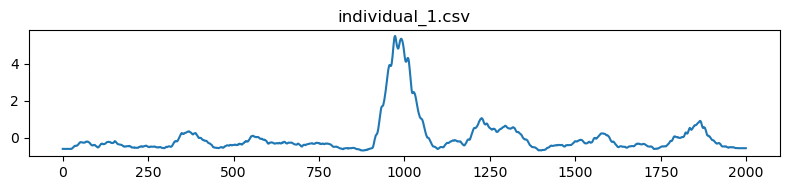

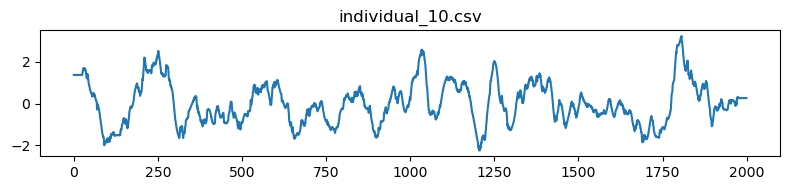

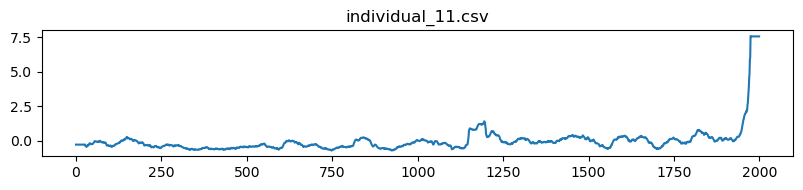

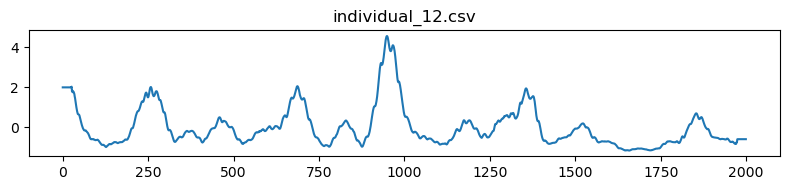

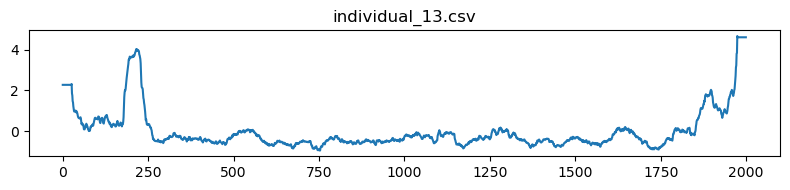

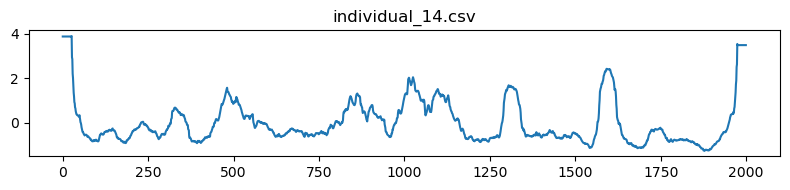

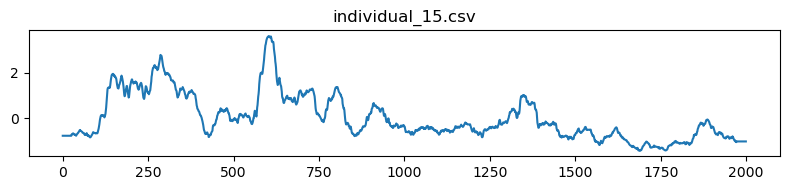

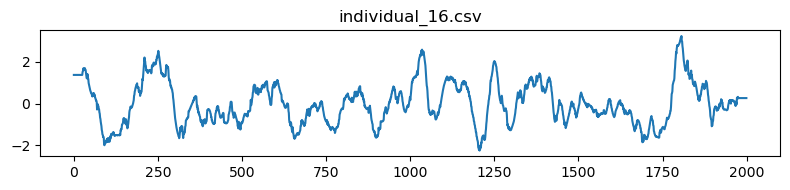

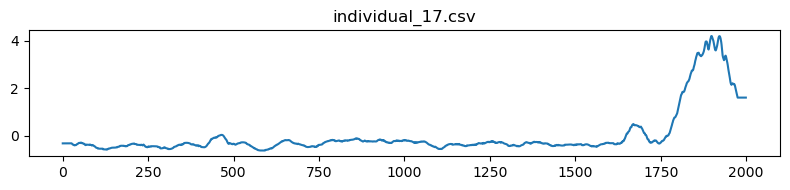

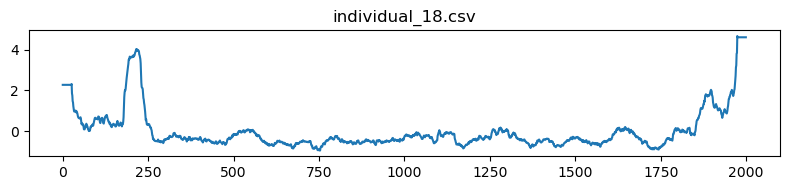

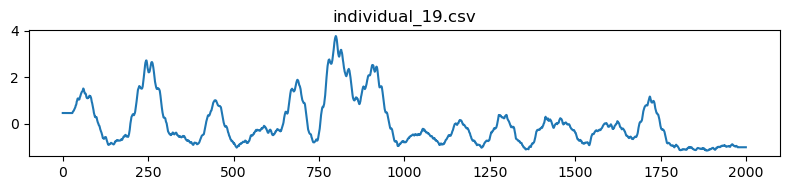

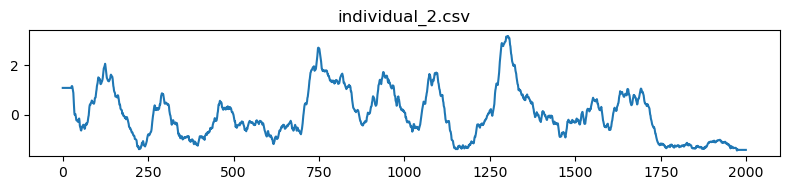

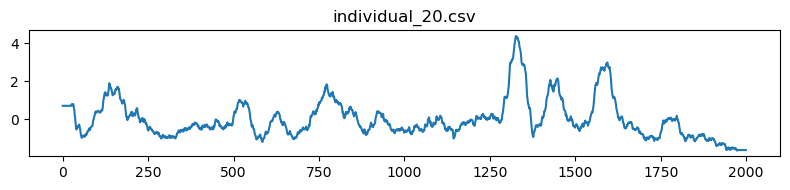

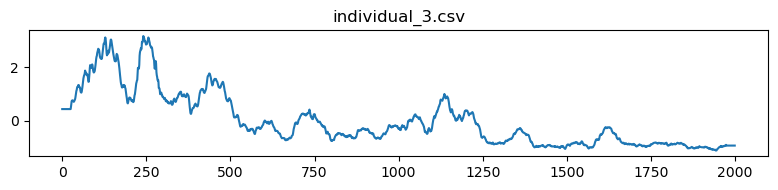

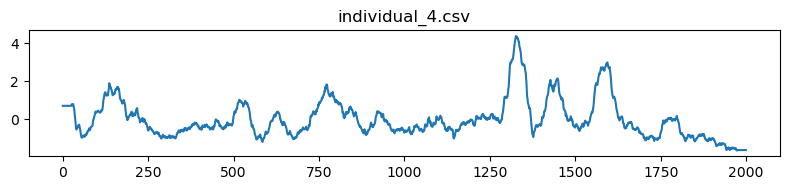

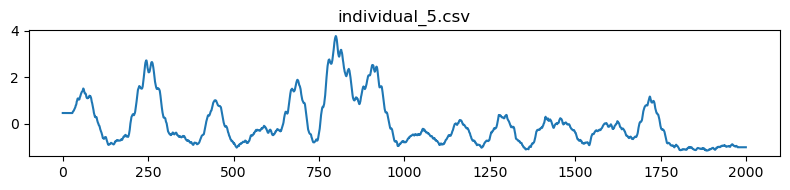

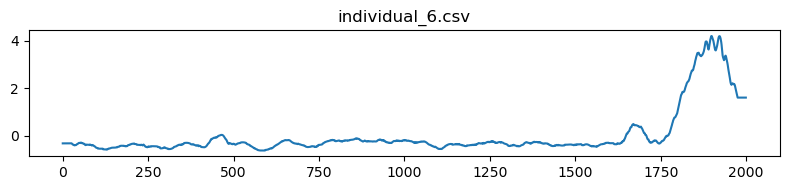

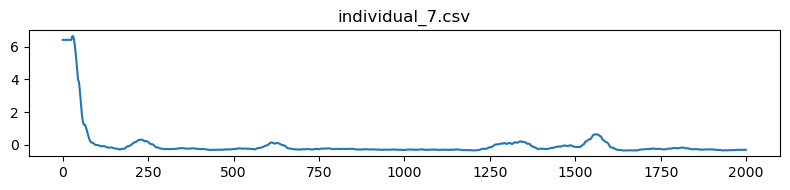

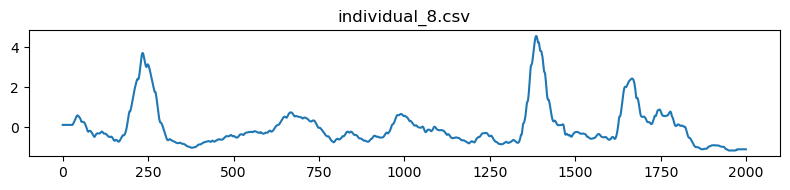

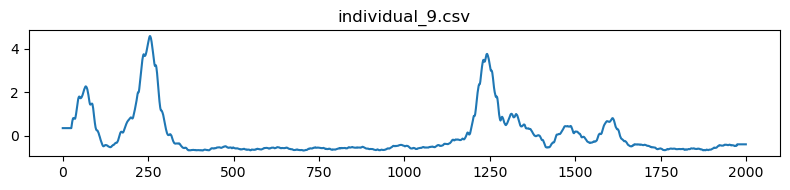

[✔] Done. Summary stats written to neurotypical\summary_stats.csv
               id  count          mean  std       min       max
0    individual_1   2000 -4.973799e-17  1.0 -0.692803  5.492213
1   individual_10   2000 -5.684342e-16  1.0 -2.258101  3.239894
2   individual_11   2000 -2.842171e-17  1.0 -0.698909  7.594556
3   individual_12   2000 -8.526513e-17  1.0 -1.155963  4.555947
4   individual_13   2000  8.526513e-17  1.0 -0.943264  4.660489
5   individual_14   2000 -2.522427e-16  1.0 -1.257390  3.896781
6   individual_15   2000 -1.705303e-16  1.0 -1.433481  3.609122
7   individual_16   2000 -5.684342e-16  1.0 -2.258101  3.239894
8   individual_17   2000  2.842171e-17  1.0 -0.628178  4.207092
9   individual_18   2000  8.526513e-17  1.0 -0.943264  4.660489
10  individual_19   2000 -1.136868e-16  1.0 -1.151128  3.775026
11   individual_2   2000 -1.278977e-16  1.0 -1.450266  3.187289
12  individual_20   2000  1.953993e-16  1.0 -1.637856  4.378021
13   individual_3   2000  2.842171e-16

In [6]:
import os
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# CONFIG
DATA_DIR = 'neurotypical'         # folder containing individual_1.csv … individual_23.csv
FS = 1000                      # sampling rate in Hz
LOWCUT, HIGHCUT = 20, 450      # EMG bandpass in Hz
ENVELOPE_WINDOW_MS = 50        # smoothing window for envelope

# HELPER: band-pass Butterworth
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut/nyq, highcut/nyq], btype='band')
    return filtfilt(b, a, signal)

# PIPELINE: filter → rectify → envelope → normalize
def preprocess_emg(raw, fs, lowcut, highcut, window_ms):
    # 1) band-pass
    filt = bandpass_filter(raw, lowcut, highcut, fs)
    # 2) full-wave rectify
    rect = np.abs(filt)
    # 3) moving-average envelope
    win_pts = max(1, int(window_ms/1000*fs))
    env = pd.Series(rect).rolling(win_pts, center=True).mean()
    env = env.fillna(method='bfill').fillna(method='ffill').values
    # 4) z-score normalize
    return (env - env.mean()) / env.std()

# MAIN
stats = []
file_list = sorted([f for f in os.listdir(DATA_DIR) if f.startswith('individual_') and f.endswith('.csv')])

print(f"[→] Found {len(file_list)} files. Processing all…")

for fname in file_list:
    path = os.path.join(DATA_DIR, fname)
    df = pd.read_csv(path)
    emg = df['EMG'].dropna().values.astype(float)
    
    proc = preprocess_emg(emg, FS, LOWCUT, HIGHCUT, ENVELOPE_WINDOW_MS)
    
    # collect summary stats
    stats.append({
        'id': fname.replace('.csv',''),
        'count': len(proc),
        'mean': proc.mean(),
        'std': proc.std(),
        'min': proc.min(),
        'max': proc.max()
    })
    
    # optional: save processed envelope back to CSV
    # out_proc = pd.DataFrame({ 'EMG_proc': proc })
    # out_proc.to_csv(os.path.join(DATA_DIR, fname.replace('.csv','_proc.csv')), index=False)
    
    # quick check-plot for every file (remove or comment out plt.show() in headless mode)
    plt.figure(figsize=(8,2))
    plt.plot(proc)
    plt.title(fname)
    plt.tight_layout()
    plt.show()

# aggregate & save stats
stats_df = pd.DataFrame(stats)
stats_df.to_csv(os.path.join(DATA_DIR, 'summary_stats.csv'), index=False)
print(f"[✔] Done. Summary stats written to {os.path.join(DATA_DIR, 'summary_stats.csv')}")
print(stats_df)


In [7]:
import os
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold, cross_validate

# ─── CONFIG ────────────────────────────────────────────────────────────────
BASE_DIR   = '.'  # parent folder holding both sub-directories
GROUP_DIRS = {'neurotypical': 0, 'neurodivergent': 1}
WIN_MS     = 250    # window length in milliseconds
STRIDE_MS  = 125    # overlap in milliseconds
FS         = 1000   # sampling rate in Hz
# ────────────────────────────────────────────────────────────────────────────

# Convert ms → sample points
win_pts    = int(WIN_MS/1000 * FS)
stride_pts = int(STRIDE_MS/1000 * FS)

# 1) Define feature extractor for one window
def window_features(sig, win, step):
    feats = []
    for start in range(0, len(sig) - win + 1, step):
        w = sig[start:start+win]
        rms = np.sqrt(np.mean(w**2))
        mav = np.mean(np.abs(w))
        zc  = ((w[:-1]*w[1:]) < 0).sum()
        wl  = np.sum(np.abs(np.diff(w)))
        ssc = np.sum(((np.diff(w[:-1]) * np.diff(w[1:])) < 0).astype(int))
        feats.append([rms, mav, zc, wl, ssc])
    return np.array(feats)


# 2) Build X, y, groups
X, y, groups = [], [], []

for grp_name, label in GROUP_DIRS.items():
    folder = os.path.join(BASE_DIR, grp_name)
    for fname in os.listdir(folder):
        if not (fname.startswith('individual_') and fname.endswith('.csv')):
            continue

        # Read the EMG column (fallback to first column)
        df = pd.read_csv(os.path.join(folder, fname))
        if 'EMG' in df.columns:
            sig = df['EMG'].values
        else:
            sig = df.iloc[:,0].values

        # Window + feature extraction
        feats = window_features(sig, win_pts, stride_pts)
        if feats.size == 0:
            print(f"Skipping {grp_name}/{fname}: too short for {WIN_MS} ms window")
            continue

        # Accumulate
        X.append(feats)
        y.extend([label] * len(feats))
        # prefix group so each subject ID is unique across groups
        groups.extend([f"{grp_name}_{fname}"] * len(feats))

# Flatten into arrays
X = np.vstack(X)            # shape: (total_windows, 5)
y = np.array(y)             # shape: (total_windows,)
groups = np.array(groups)   # shape: (total_windows,)

print("Classes found in y:", np.unique(y))
print(f"Dataset shape → windows: {X.shape[0]}, features: {X.shape[1]}")
print("Unique subjects:", len(np.unique(groups)))

# 3) Pipeline + GroupKFold CV
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',   RandomForestClassifier(n_estimators=100, random_state=42))
])

gkf = GroupKFold(n_splits=5)
res = cross_validate(
    pipe, X, y,
    groups=groups,
    cv=gkf,
    scoring=['accuracy','roc_auc'],
    n_jobs=-1
)

print(f"Mean Accuracy: {res['test_accuracy'].mean():.3f}")
print(f"Mean ROC AUC : {res['test_roc_auc'].mean():.3f}")


Classes found in y: [0 1]
Dataset shape → windows: 635, features: 5
Unique subjects: 43
Mean Accuracy: 0.803
Mean ROC AUC : 0.897


In [8]:
pipe.fit(X, y)
importances = pipe.named_steps['clf'].feature_importances_
feature_names = ['RMS','MAV','ZC','WL','SSC']
for name, imp in zip(feature_names, importances):
    print(f"{name}: {imp:.3f}")


RMS: 0.221
MAV: 0.195
ZC: 0.000
WL: 0.361
SSC: 0.223


In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
  'clf__n_estimators': [50,100,200],
  'clf__max_depth': [None,10,20]
}

gs = GridSearchCV(pipe, param_grid,
                  cv=GroupKFold(n_splits=5),
                  scoring='roc_auc', n_jobs=-1)
gs.fit(X, y, groups=groups)
print("Best AUC:", gs.best_score_)
print("Best params:", gs.best_params_)


Best AUC: 0.9020822753654413
Best params: {'clf__max_depth': 10, 'clf__n_estimators': 200}


Fold 1 confusion:
 [[59  1]
 [15 47]]
Fold 2 confusion:
 [[59  1]
 [ 3 59]]
Fold 3 confusion:
 [[41 19]
 [12 49]]
Fold 4 confusion:
 [[55 20]
 [15 45]]
Fold 5 confusion:
 [[44  1]
 [40 50]]


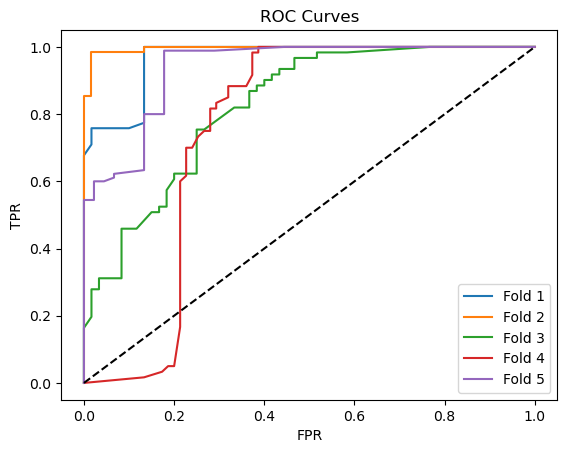

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix

gkf = GroupKFold(5)
for fold, (train_i, test_i) in enumerate(gkf.split(X, y, groups=groups), 1):
    pipe.fit(X[train_i], y[train_i])
    probs = pipe.predict_proba(X[test_i])[:,1]
    fpr, tpr, _ = roc_curve(y[test_i], probs)
    plt.plot(fpr, tpr, label=f'Fold {fold}')
    cm = confusion_matrix(y[test_i], pipe.predict(X[test_i]))
    print(f"Fold {fold} confusion:\n", cm)
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curves')
plt.show()


In [11]:
# assume pipe is already trained on all data, or retrained per fold for hold-out:
probas = pipe.predict_proba(X)[:,1]   # shape = (total_windows,)


In [12]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

# assume `groups` and `probas` are already defined from your model
df = pd.DataFrame({
    'subject': groups,   
    'proba':   probas
})

# 1) Average window-level probabilities into one score per subject
agg = df.groupby('subject', as_index=False)['proba'].mean()

# 2) Predict with a 0.5 threshold
agg['pred'] = (agg['proba'] >= 0.5).astype(int)

# 3) Recover the true label from the subject string
#    we named them "neurotypical_<file>" → 0, "neurodivergent_<file>" → 1
agg['true'] = agg['subject'].apply(
    lambda s: 0 if s.startswith('neurotypical_') else 1
)

# 4) Compute subject-level accuracy and confusion
acc = accuracy_score(agg['true'], agg['pred'])
cm  = confusion_matrix(agg['true'], agg['pred'])

print("Subject-level Accuracy:", acc)
print("Subject-level Confusion Matrix:\n", cm)


Subject-level Accuracy: 0.9302325581395349
Subject-level Confusion Matrix:
 [[20  0]
 [ 3 20]]


In [13]:
import numpy as np
from sklearn.metrics import roc_curve

# get all window-level probs & true labels repeated per window
y_true_win = np.array([0 if s.startswith('neurotypical_') else 1 for s in groups])
fpr, tpr, thresholds = roc_curve(y_true_win, probas)

# compute J = TPR – FPR, find best index
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
best_thresh = thresholds[best_idx]

print("Optimal threshold:", best_thresh)
# Re-aggregate at subject level with best_thresh:
agg['pred_opt'] = (agg['proba'] >= best_thresh).astype(int)
new_acc = accuracy_score(agg['true'], agg['pred_opt'])
new_cm  = confusion_matrix(agg['true'], agg['pred_opt'])
print("New subject-level Acc:", new_acc)
print("New CM:\n", new_cm)


Optimal threshold: 0.28
New subject-level Acc: 0.9767441860465116
New CM:
 [[20  0]
 [ 1 22]]


In [14]:
from sklearn.calibration import CalibratedClassifierCV

# Build your base RF with best params
base_rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Wrap it in a 5-fold calibrator (no groups)
calibrated = CalibratedClassifierCV(base_rf, cv=5, method='sigmoid')
calibrated.fit(X, y)         # no groups arg here
cal_probas = calibrated.predict_proba(X)[:,1]


In [15]:
import numpy as np
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold

cal_probas = np.zeros_like(y, dtype=float)
gkf = GroupKFold(n_splits=5)

for train_idx, val_idx in gkf.split(X, y, groups):
    # 1) Train RF on train split
    rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
    rf.fit(X[train_idx], y[train_idx])

    # 2) Calibrate on the held‐out group split
    calibrator = CalibratedClassifierCV(rf, method='sigmoid', cv='prefit')
    calibrator.fit(X[val_idx], y[val_idx])

    # 3) Store calibrated probs for that validation fold
    cal_probas[val_idx] = calibrator.predict_proba(X[val_idx])[:,1]

# Now `cal_probas` holds your group-aware, calibrated window‐level probabilities.


In [16]:
# subject‐level aggregation on cal_probas
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.DataFrame({'subject': groups, 'proba': cal_probas})
agg = df.groupby('subject', as_index=False)['proba'].mean()
agg['pred'] = (agg['proba'] >= best_thresh).astype(int)
agg['true'] = agg['subject'].str.startswith('neurotypical_').map({True:0, False:1})

print("Subject Acc:", accuracy_score(agg['true'], agg['pred']))
print("Subject CM:\n", confusion_matrix(agg['true'], agg['pred']))


Subject Acc: 0.8837209302325582
Subject CM:
 [[15  5]
 [ 0 23]]


In [ ]:
# --- train_and_save_model.py ---
import os
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve # For determining optimal threshold
import joblib # For saving the model and threshold

# ─── CONFIG (Copied from your analysis script) ───────────────────────────
BASE_DIR   = '.'  # Assuming your 'neurotypical' and 'neurodivergent' folders are here
                  # Or adjust to 'FYP/' if this script is outside the FYP folder
                  # and your data is inside FYP/neurotypical, FYP/neurodivergent
GROUP_DIRS = {'neurotypical': 0, 'neurodivergent': 1}
WIN_MS     = 250
STRIDE_MS  = 125
FS         = 1000

# Best hyperparameters found from your GridSearchCV
BEST_N_ESTIMATORS = 200
BEST_MAX_DEPTH = 10
# Optimal threshold found from your ROC analysis
# You can either recalculate it here based on all_X_probas,
# or use the value you found (0.28) if you are confident it's robust.
# For this script, we will recalculate it to be self-contained.
# PRE_CALCULATED_OPTIMAL_THRESHOLD = 0.28 # Option to use your previous finding
# ──────────────────────────────────────────────────────────────────────────

# Convert ms → sample points
win_pts    = int(WIN_MS/1000 * FS)
stride_pts = int(STRIDE_MS/1000 * FS)

# 1) Define feature extractor for one window (Copied from your analysis script)
def window_features(sig, win, step):
    feats = []
    # Ensure signal is a NumPy array for consistent processing
    if not isinstance(sig, np.ndarray):
        sig = np.array(sig)

    if len(sig) < win: # Check if signal is shorter than one window
        return np.array(feats) # Return empty if too short

    for start in range(0, len(sig) - win + 1, step):
        w = sig[start:start+win]
        rms = np.sqrt(np.mean(w**2))
        mav = np.mean(np.abs(w))
        zc  = ((w[:-1]*w[1:]) < 0).sum()
        wl  = np.sum(np.abs(np.diff(w)))
        ssc = np.sum(((np.diff(w[:-1]) * np.diff(w[1:])) < 0).astype(int))
        feats.append([rms, mav, zc, wl, ssc])
    return np.array(feats)


# 2) Build X_all, y_all (using all your data for final training - Copied from your analysis script)
print("Step 1: Loading and Preparing ALL Data for Final Training...")
X_all, y_all = [], []
# groups_all = [] # Not strictly needed for final training, but good for consistency if you want to track

for grp_name, label in GROUP_DIRS.items():
    folder = os.path.join(BASE_DIR, grp_name)
    if not os.path.isdir(folder):
        print(f"Warning: Directory not found - {folder}. Make sure BASE_DIR is correct. Skipping.")
        continue
    for fname in os.listdir(folder):
        if not (fname.startswith('individual_') and fname.endswith('.csv')):
            continue

        file_path = os.path.join(folder, fname)
        try:
            df = pd.read_csv(file_path)
            sig_temp = None
            if 'EMG' in df.columns:
                sig_temp = df['EMG'].values
            elif df.shape[1] > 0: # Fallback to first column if 'EMG' not present
                sig_temp = df.iloc[:,0].values
                # print(f"Note: Used first column from {fname} as EMG data.")
            else:
                print(f"Warning: No EMG data columns found in {fname}. Skipping.")
                continue
            
            # Ensure signal is numeric and clean
            sig = pd.to_numeric(sig_temp, errors='coerce')
            sig = sig[~np.isnan(sig)] # Remove NaNs

            if len(sig) == 0:
                print(f"Warning: No valid numeric EMG data after cleaning in {fname}. Skipping.")
                continue

            feats = window_features(sig, win_pts, stride_pts)
            if feats.size == 0:
                # This message is already in your original script, so it's fine
                # print(f"Skipping {grp_name}/{fname}: too short for {WIN_MS} ms window during final model training")
                continue
            
            X_all.append(feats)
            y_all.extend([label] * len(feats))
            # groups_all.extend([f"{grp_name}_{fname}"] * len(feats))
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")


if not X_all:
    raise ValueError("No data was processed for X_all. Please check BASE_DIR and data availability in subfolders 'neurotypical' and 'neurodivergent'.")

X_all = np.vstack(X_all)
y_all = np.array(y_all)
# groups_all = np.array(groups_all)

print(f"Final training data shape (X_all): {X_all.shape}")
print(f"Final training labels shape (y_all): {y_all.shape}")
print(f"Unique classes in y_all: {np.unique(y_all)}")

# 3) Define and Train the Final Model Pipeline
print("\nStep 2: Defining and Training Final Model Pipeline with Best Hyperparameters...")
final_model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',    RandomForestClassifier(
                    n_estimators=BEST_N_ESTIMATORS, # From your GridSearchCV
                    max_depth=BEST_MAX_DEPTH,       # From your GridSearchCV
                    random_state=42,
                    class_weight='balanced' # Good practice
                ))
])

# Train the pipeline on ALL the windowed data
final_model_pipeline.fit(X_all, y_all)
print("Final model pipeline trained successfully.")

# 4) Determine the Optimal Threshold (based on probabilities from the model trained on all data)
print("\nStep 3: Determining Optimal Threshold...")
all_window_probabilities = final_model_pipeline.predict_proba(X_all)[:, 1]

fpr, tpr, thresholds_roc = roc_curve(y_all, all_window_probabilities) # y_all are window-level labels
j_scores = tpr - fpr  # Youden's J statistic
best_threshold_idx = np.argmax(j_scores)
optimal_threshold = thresholds_roc[best_threshold_idx]

print(f"Optimal threshold determined from all training data probabilities: {optimal_threshold:.4f}")
# If you strongly prefer the 0.28 from your earlier CV analysis, you can uncomment the next lines:
# optimal_threshold = PRE_CALCULATED_OPTIMAL_THRESHOLD
# print(f"Using pre-determined optimal threshold from CV analysis: {optimal_threshold}")


# 5) Save the Trained Pipeline and the Optimal Threshold
print("\nStep 4: Saving Model and Threshold...")
model_output_filename = 'emg_neurodiversity_pipeline.joblib'
threshold_output_filename = 'emg_neurodiversity_threshold.joblib'

joblib.dump(final_model_pipeline, model_output_filename)
joblib.dump(optimal_threshold, threshold_output_filename)

print(f"Trained pipeline saved to: {model_output_filename}")
print(f"Optimal threshold ({optimal_threshold:.4f}) saved to: {threshold_output_filename}")
print("\nProcess complete.")

Step 1: Loading and Preparing ALL Data for Final Training...
Final training data shape (X_all): (635, 5)
Final training labels shape (y_all): (635,)
Unique classes in y_all: [0 1]

Step 2: Defining and Training Final Model Pipeline with Best Hyperparameters...
Final model pipeline trained successfully.

Step 3: Determining Optimal Threshold...
Optimal threshold determined from all training data probabilities: 0.4965

Step 4: Saving Model and Threshold...
Trained pipeline saved to: emg_neurodiversity_pipeline.joblib
Optimal threshold (0.4965) saved to: emg_neurodiversity_threshold.joblib

Process complete. You can now use these files in your Streamlit app.
Place these .joblib files in the same directory as your Streamlit .py script.


In [21]:
import pandas as pd
import os
import glob

# Define paths and labels
neurotypical_path = 'neurotypical/'
neurodivergent_path = 'neurodivergent/' # Root directory for the uploaded neurodivergent files

neurotypical_files = sorted(glob.glob(os.path.join(neurotypical_path, 'individual_*.csv')))
# Exclude the summary file if it matches the pattern
neurotypical_files = [f for f in neurotypical_files if 'summary_stats' not in f]


# Manually list neurodivergent files based on uploads (since they are not in a subfolder)
# This assumes the files were uploaded directly without a containing folder for neurodivergent
neurodivergent_files_batch1 = [f'individual_{i}.csv' for i in range(1, 11)]
neurodivergent_files_batch2 = [f'individual_{i}.csv' for i in range(11, 21)]
neurodivergent_files_batch3 = [f'individual_{i}.csv' for i in range(21, 24)]
all_neurodivergent_files_relative = neurodivergent_files_batch1 + neurodivergent_files_batch2 + neurodivergent_files_batch3

# Create absolute paths based on how files are mounted/accessed in the environment
# Assuming they are in the root '.' directory
neurodivergent_files = [os.path.join(neurodivergent_path, f) for f in all_neurodivergent_files_relative]


all_dfs = []

# Process Neurotypical files
print(f"Processing {len(neurotypical_files)} neurotypical files...")
for f_path in neurotypical_files:
    try:
        # Extract subject ID from filename
        subject_id = os.path.basename(f_path).replace('.csv', '')

        # Load the CSV
        df = pd.read_csv(f_path)

        # Add identifier columns
        df['subject_id'] = subject_id
        df['group'] = 0  # 0 for neurotypical

        # Append to list
        all_dfs.append(df)
    except Exception as e:
        print(f"Error processing {f_path}: {e}")

# Process Neurodivergent files
print(f"Processing {len(neurodivergent_files)} neurodivergent files...")
for f_path in neurodivergent_files:
     # Check if file actually exists before trying to read
    if os.path.exists(f_path):
        try:
            # Extract subject ID from filename, add prefix to distinguish
            subject_id = 'nd_' + os.path.basename(f_path).replace('.csv', '')

            # Load the CSV
            df = pd.read_csv(f_path)

            # Add identifier columns
            df['subject_id'] = subject_id
            df['group'] = 1  # 1 for neurodivergent

            # Append to list
            all_dfs.append(df)
        except Exception as e:
            print(f"Error processing {f_path}: {e}")
    else:
        print(f"File not found: {f_path}")


# Combine all DataFrames
if all_dfs:
    combined_df = pd.concat(all_dfs, ignore_index=True)
    print("\nData loaded and combined successfully.")
    print(f"Total rows: {combined_df.shape[0]}")
    print(f"Total columns: {combined_df.shape[1]}")
    print("\nFirst 5 rows of the combined data:")
    print(combined_df.head())
    print("\nLast 5 rows of the combined data:")
    print(combined_df.tail())

    # Check the distribution of groups
    print("\nGroup distribution:")
    print(combined_df['group'].value_counts())

    # Check number of unique subjects per group
    print("\nNumber of unique subjects per group:")
    print(combined_df.groupby('group')['subject_id'].nunique())

else:
    print("No dataframes were loaded. Please check file paths and content.")

Processing 20 neurotypical files...
Processing 23 neurodivergent files...

Data loaded and combined successfully.
Total rows: 85174
Total columns: 3

First 5 rows of the combined data:
   EMG    subject_id  group
0  283  individual_1      0
1  283  individual_1      0
2  284  individual_1      0
3  284  individual_1      0
4  285  individual_1      0

Last 5 rows of the combined data:
       EMG        subject_id  group
85169  263  nd_individual_23      1
85170  328  nd_individual_23      1
85171  264  nd_individual_23      1
85172  320  nd_individual_23      1
85173  267  nd_individual_23      1

Group distribution:
group
1    45174
0    40000
Name: count, dtype: int64

Number of unique subjects per group:
group
0    20
1    23
Name: subject_id, dtype: int64


In [ ]:
import numpy as np
import pandas as pd

# — start feature extraction
records = []
for subject_id, grp in combined_df.groupby('subject_id'):
    sig = grp['EMG'].values

    # EMG summary features
    mean_abs       = np.mean(np.abs(sig))
    variance       = np.var(sig)
    rms            = np.sqrt(np.mean(sig**2))
    zero_crossings = np.sum(np.abs(np.diff(np.sign(sig))) > 0)
    waveform_length= np.sum(np.abs(np.diff(sig)))

    # Inter-burst interval variance (tapping proxy)
    rect      = np.abs(sig - sig.mean())
    thresh    = rect.mean() + 2*rect.std()
    mask      = rect > thresh
    edges     = np.where(mask & ~np.concatenate(([False], mask[:-1])))[0]
    intervals = np.diff(edges)
    var_interval = np.var(intervals) if len(intervals)>1 else 0.0

    # Group label (0=neurotypical, 1=neurodivergent)
    label = grp['group'].iloc[0]

    records.append({
        'subject_id':       subject_id,
        'label':            label,
        'mean_abs':         mean_abs,
        'variance':         variance,
        'rms':              rms,
        'zero_crossings':   zero_crossings,
        'waveform_length':  waveform_length,
        'var_interval':     var_interval
    })

df_features = pd.DataFrame(records)
print("Computed feature matrix:", df_features.shape)
df_features.head()


Computed feature matrix: (43, 8)


,subject_id,label,mean_abs,variance,rms,zero_crossings,waveform_length,var_interval
0,individual_1,0,297.7165,526.759128,298.599855,0,1495,106880.222222
1,individual_10,0,303.4485,0.370348,303.449110,0,771,5598.876731
2,individual_11,0,302.3820,67.810076,302.494106,0,21524,408.311479
3,individual_12,0,301.2925,1419.732944,303.639430,0,45661,4596.239796
4,individual_13,0,297.8170,37.667511,297.880233,0,21793,69756.750000


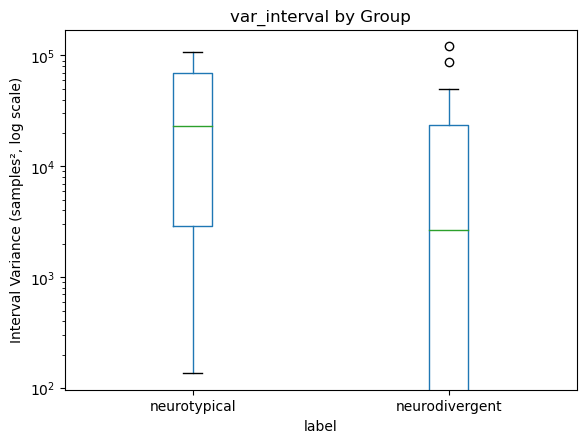

Medians:
label
0    23062.791667
1     2656.467456
Name: var_interval, dtype: float64


In [23]:
import matplotlib.pyplot as plt

# boxplot on a log scale, since the variances spread wide
df_features.boxplot(column='var_interval',
                    by='label',
                    grid=False,
                    showfliers=True)
plt.yscale('log')
plt.xticks([1,2], ['neurotypical','neurodivergent'])
plt.ylabel('Interval Variance (samples², log scale)')
plt.title('var_interval by Group')
plt.suptitle('')
plt.show()

print("Medians:")
print(df_features.groupby('label')['var_interval'].median())


<Figure size 600x400 with 0 Axes>

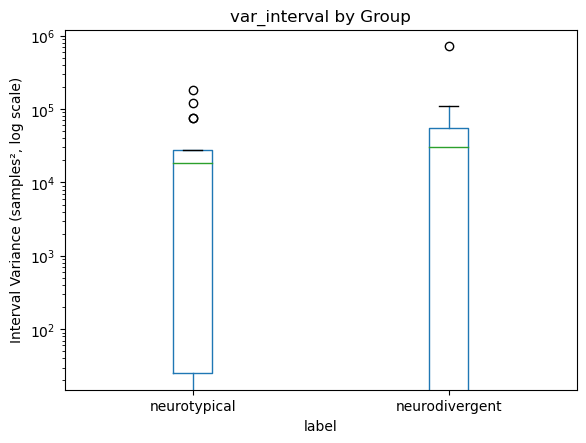

Medians:
label
0    18348.833333
1    30250.888889
Name: var_interval, dtype: float64

New median‐based threshold T = 24299.9 sample-count²


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# 1) Specify your EMG sampling rate (Hz)
fs = 1000  

# 2) Envelope smoothing function
def smooth_envelope(sig, fs, cutoff=10):
    """
    Full-wave rectifies and low-pass filters at `cutoff` Hz.
    Returns a clean envelope.
    """
    # rectify around zero‐mean
    rect = np.abs(sig - np.mean(sig))
    # design 4th-order Butterworth low-pass
    b, a = butter(4, cutoff/(fs/2), btype='low')
    # zero-phase filter
    env = filtfilt(b, a, rect)
    return env

# 3) Burst detection via top‐percentile + min gap
def detect_bursts(env, pct=90, min_gap_s=0.1, fs=1000):
    """
    env     : the envelope array
    pct     : percentile threshold for event detection
    min_gap_s : minimum seconds between detected bursts
    fs      : sampling rate in Hz
    """
    thresh = np.percentile(env, pct)
    mask   = env > thresh
    edges  = np.where(mask & ~np.concatenate(([False], mask[:-1])))[0]

    # enforce minimum gap
    min_gap = int(min_gap_s * fs)
    clean = []
    last = -min_gap
    for e in edges:
        if e - last >= min_gap:
            clean.append(e)
            last = e
    return np.array(clean)

# 4) Recompute var_interval for each subject
records = []
for sid, grp in combined_df.groupby('subject_id'):
    sig = grp['EMG'].values

    # get smoothed envelope
    env = smooth_envelope(sig, fs=fs, cutoff=10)
    bursts = detect_bursts(env, pct=90, min_gap_s=0.1, fs=fs)
    intervals = np.diff(bursts)
    var_iv = float(np.var(intervals)) if len(intervals)>1 else 0.0

    # keep existing summary features + overwrite var_interval
    base = df_features.loc[df_features.subject_id==sid].iloc[0].to_dict()
    base['var_interval'] = var_iv
    records.append(base)

df_features = pd.DataFrame(records)

# 5) Boxplot & medians on log-scale
plt.figure(figsize=(6,4))
df_features.boxplot(column='var_interval', by='label', grid=False, showfliers=True)
plt.yscale('log')
plt.xticks([1,2], ['neurotypical','neurodivergent'])
plt.ylabel('Interval Variance (samples², log scale)')
plt.title('var_interval by Group')
plt.suptitle('')
plt.show()

print("Medians:")
print(df_features.groupby('label')['var_interval'].median())

# 6) Recompute threshold T
VT = df_features[df_features.label==0]['var_interval'].median() 
VD = df_features[df_features.label==1]['var_interval'].median()
T  = (VT + VD) / 2
print(f"\nNew median‐based threshold T = {T:.1f} sample-count²")  